<h1 align="center"> Logistic Regression (MNIST) </h1>

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
<br>
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

The MNIST database of handwritten digits is available on the following website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

Four Files are available on this site:

[train-images-idx3-ubyte.gz:  training set images (9912422 bytes)](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz) 
<br>
[train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)](http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz)
<br>
[t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)](http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz) 
<br>
[t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)](http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz)

In [49]:
import numpy as np 
import matplotlib.pyplot as plt

# Used for Confusion Matrix
from sklearn import metrics
import seaborn as sns

# Used for Loading MNIST
from struct import unpack

%matplotlib inline

You can download the data via command line (you can see this on the youtube video) or you can get them from the website or my github. 

## Downloading MNIST Dataset

In [2]:
# !wget -O data/train-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

--2017-06-29 22:43:27--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘data/train-images-idx3-ubyte.gz’

data/train-images-i 100%[=====================>]   9.45M  2.68MB/s   in 4.2s   

2017-06-29 22:43:32 (2.23 MB/s) - ‘data/train-images-idx3-ubyte.gz’ saved [9912422/9912422]



In [11]:
# !wget -O data/train-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

--2017-06-18 01:55:28--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘data/train-labels-idx1-ubyte.gz’

data/train-labels-i 100%[=====================>]  28.20K  --.-KB/s   in 0.09s  

2017-06-18 01:55:28 (307 KB/s) - ‘data/train-labels-idx1-ubyte.gz’ saved [28881/28881]



In [12]:
# !wget -O data/t10k-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz

--2017-06-18 01:55:29--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1648877 (1.6M) [application/x-gzip]
Saving to: ‘data/t10k-images-idx3-ubyte.gz’

data/t10k-images-id 100%[=====================>]   1.57M   953KB/s   in 1.7s   

2017-06-18 01:55:30 (953 KB/s) - ‘data/t10k-images-idx3-ubyte.gz’ saved [1648877/1648877]



In [13]:
# !wget -O data/t10k-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2017-06-18 01:55:31--  http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4542 (4.4K) [application/x-gzip]
Saving to: ‘data/t10k-labels-idx1-ubyte.gz’

data/t10k-labels-id 100%[=====================>]   4.44K  --.-KB/s   in 0s     

2017-06-18 01:55:31 (15.4 MB/s) - ‘data/t10k-labels-idx1-ubyte.gz’ saved [4542/4542]



<b>If you cant unzip the file, you can try gzip or download it from [my github](https://github.com/mGalarnyk/Python_Tutorials/tree/master/Sklearn/Logistic_Regression/data)</b>

In [1]:
# decompress gzipped file
# !info gzip
# !gzip -d data/*.gz

gzip: can't stat: data/*.gz (data/*.gz.gz): No such file or directory


## Loading MNIST Dataset

In [50]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [51]:
train_img, train_lbl = loadmnist('data/train-images-idx3-ubyte'
                                 , 'data/train-labels-idx1-ubyte')
test_img, test_lbl = loadmnist('data/t10k-images-idx3-ubyte'
                               , 'data/t10k-labels-idx1-ubyte')

In [41]:
print(train_img.shape)

(60000, 784)


In [23]:
print(train_lbl.shape)

(60000,)


In [11]:
print(test_img.shape)

(10000, 784)


In [12]:
print(test_lbl.shape)

(10000,)


## Showing Training Digits and Labels

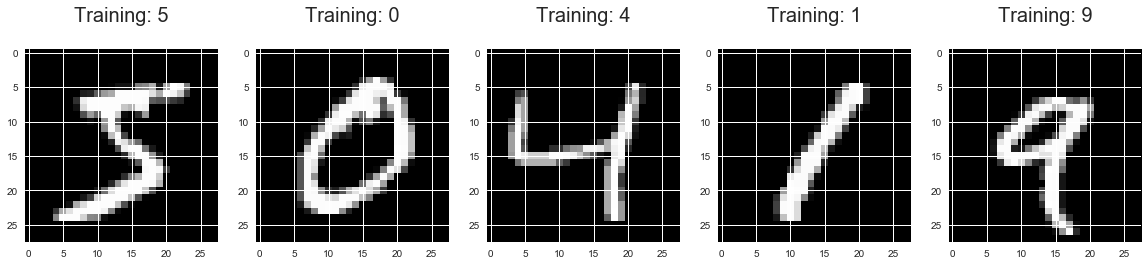

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [9]:
# This is how the computer sees the number 5
print(train_img[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## Using Logistic Regression on Entire Dataset 

[Logistic Regression Sklearn Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <br>
One thing I like to mention is the importance of parameter tuning. While it may not have mattered much for the toy digits dataset, it can make a major difference on larger and more complex datasets you have. <b>Please see the parameter: solver</b>

<b>Step 1: </b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [52]:
from sklearn.linear_model import LogisticRegression 

<b>Step 2:</b> Make an instance of the Model

In [54]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [55]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

<b>Step 4:</b> Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [56]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([7], dtype=uint8)

In [57]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

## Measuring Model Performance

accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [29]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9174


## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

<b>Note: Seaborn needs to be installed for this portion </b>

In [35]:
# !conda install seaborn -y

In [36]:
# Make predictions on test data
predictions = logisticRegr.predict(test_img)

In [37]:
cm = metrics.confusion_matrix(test_lbl, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

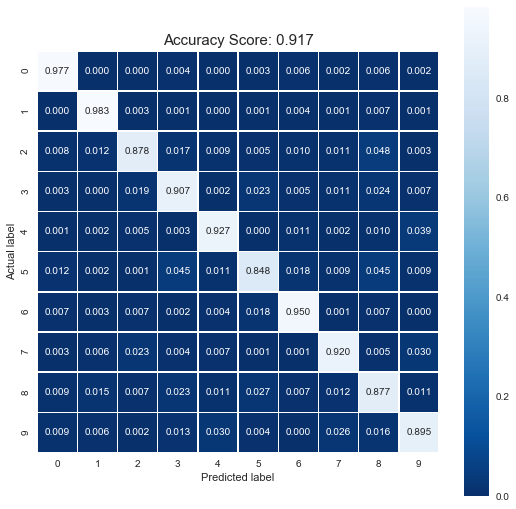

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

## Display Misclassified images with Predicted Labels

In [39]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

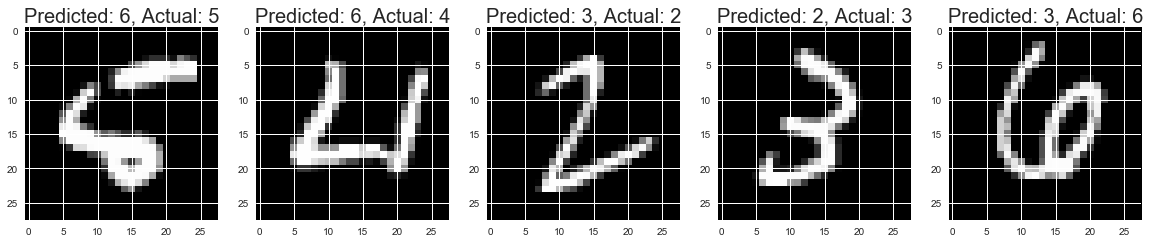

In [40]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 20)

## Checking Performance Based on Training Set Size

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

In [46]:
regr = LogisticRegression(solver = 'lbfgs')

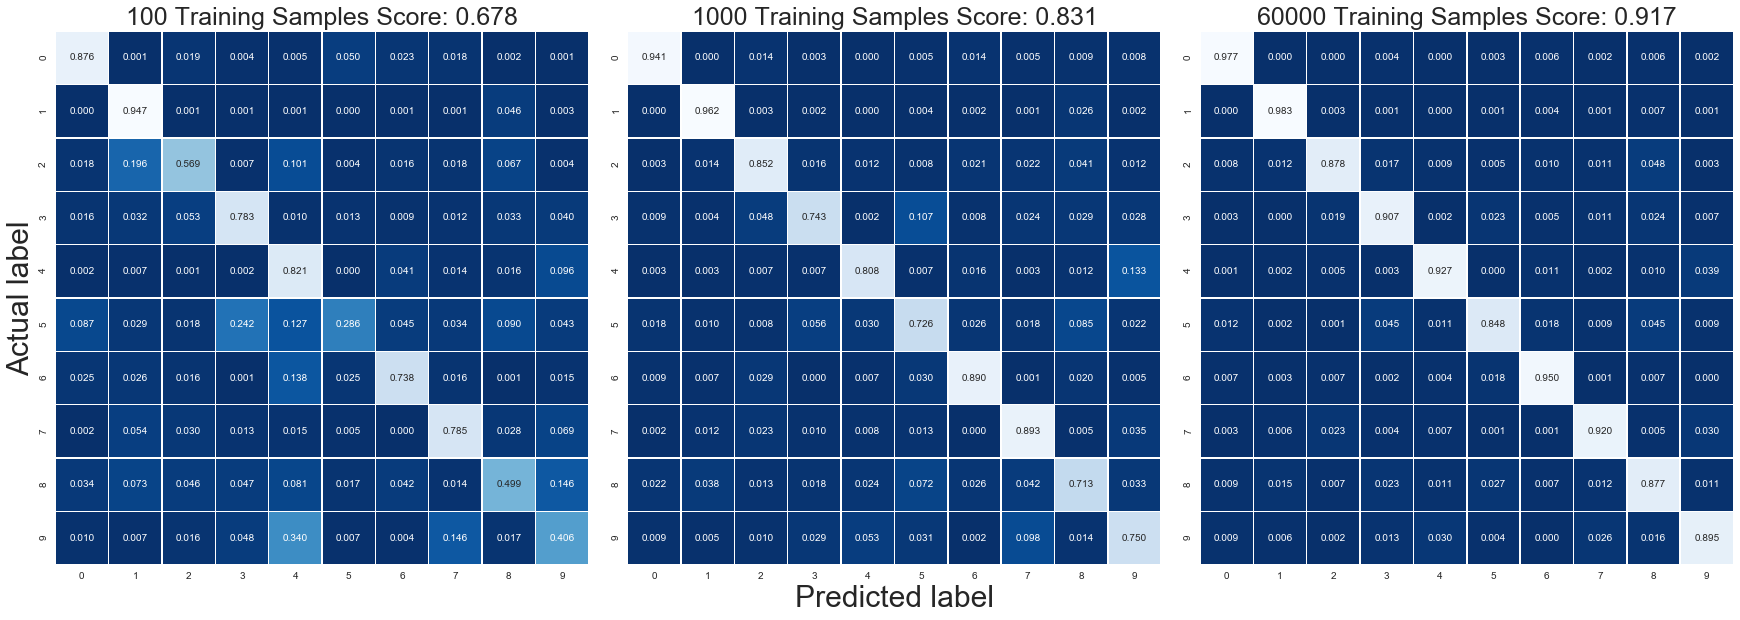

In [60]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (24,8));
plt.tight_layout()

for plotIndex, sample_size in enumerate([100, 1000, 60000]):
    X_train = train_img[:sample_size].reshape(sample_size, 784)
    y_train = train_lbl[:sample_size]
    regr.fit(X_train, y_train)
    predicted = regr.predict(test_img)
    cm = metrics.confusion_matrix(test_lbl, predicted)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[plotIndex], cbar = False);
    accuracyString = '{:g} Training Samples Score: {:.3f}'.format(sample_size, regr.score(test_img, test_lbl)) 
    axes[plotIndex].set_title(accuracyString, size = 25);

axes[0].set_ylabel('Actual label', fontsize = 30);
axes[1].set_xlabel('Predicted label', fontsize = 30);

<b>if this tutorial doesn't cover what you are looking for, please leave a comment on the youtube video and I will try to cover what you are interested in. </b>

[youtube video](https://www.youtube.com/watch?v=71iXeuKFcQM)